# Gradient Descent

In [1]:
import numpy as np
import matplotlib.pyplot as plt

**Objective:**

Use Gradient Descent to computationally find out the minimum points of the following functions
1. Single variable function: $y=5(3x+4)^2+12$
2. Two variable function: $z=(x-7)^2+2(y+5)^2+2xy$

Gradient Descent is a method to computationally minimize a function without using analytical methods. It is useful when the function may be too complex to solve analytically.

1. Single variable function $y = 5(3x+4)^2+12 $

In [2]:
def y(x):
    return 5*(3*x+4)**2+12

In [3]:
def gradient_descent_single(y,h=0.7,x=10):
    gradient = -1
    x_list =[]
    y_list =[]
    x_new = x
    while abs(gradient)>0.004:
        x = x_new
        gradient = (y(x+0.0001)-y(x))/0.0001
        y_old = y(x)
        x_list.append(x)
        y_list.append(y_old)
        x_new = x-h*gradient
        y_new = y(x_new)
        
        #Adjust the stepsize to ensure convergence
        while y_new> y_old:
            h = h*0.9
            x_new = x-h*gradient
            y_new = y(x_new)
            
    plt.plot(x_list,y_list,color='darkorange',marker='o',ls="--")
    return x,y_old
    

The minimum value of y is 12.0 at x = -1.33


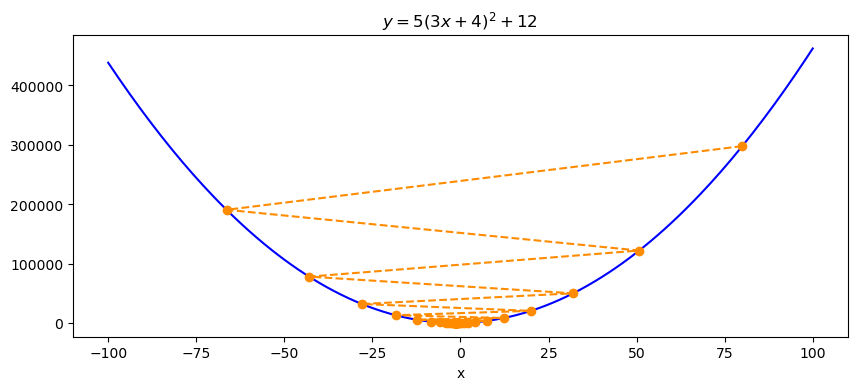

In [4]:
plt.figure(figsize=(10,4),dpi=100)
plt.plot([i for i in range(-100,101)],[y(i) for i in range(-100,101)],color='blue')
g = gradient_descent_single(y,x=80,h=0.02)
plt.xlabel('x')
plt.title('$y=5(3x+4)^2+12$')
print(f'The minimum value of y is {round(g[1],2)} at x = {round(g[0],2)}')

The key idea is that the gradient gives the direction of steepest increase in the function. The parameter h is used to control the step size in the opposite direction. The value of h is constantly adjusted in proportional to the gradient value so that convergence can be ensured.

2. Two variable function: $z=(x-7)^2+2(y+5)^2+2xy$

In [23]:
def z(xy):
    return (xy[0]-7)**2+2*(xy[1]+5)**2+2*(xy[0]*xy[1])

In [6]:
def gradient_descent_two(z,h=0.7,x=10,y=20):
    gradient = np.array([1.01,1.01])
    xy = np.array([x,y])
    xy_new = xy
    dxy = 0.001 
    x_list=[]
    y_list=[]
    while abs(gradient[0])>0.004 or abs(gradient[1])>0.004:
        xy = xy_new
        gradient[0] = (z((xy[0]+dxy,xy[1]))-z(xy))/dxy
        gradient[1] = (z((xy[0],xy[1]+dxy))-z(xy))/dxy
        z_old = z(xy)
        x_list.append(xy[0])
        y_list.append(xy[1])
        xy_new = xy-h*gradient
        z_new = z(xy_new)
        
        #Adjust the stepsize to ensure convergence
        while z_new> z_old:
            h = 0.9*h
            xy_new = xy-h*gradient
            z_new = z(xy_new)
    return xy,z_old,x_list,y_list

The minimum value of the function is -239.0 at the point [ 23.99970408 -17.0009788 ]


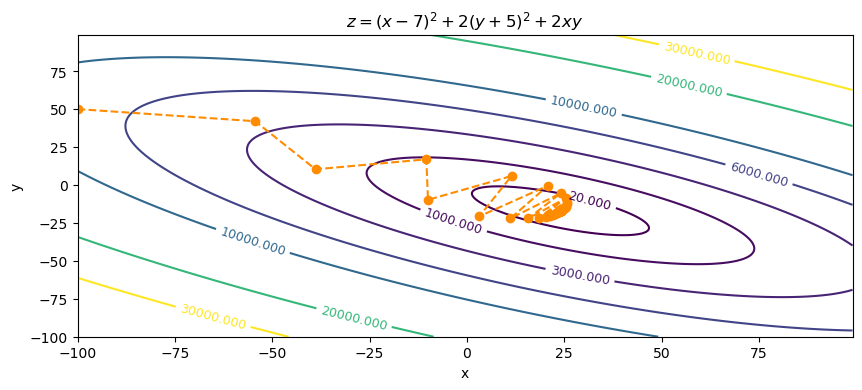

In [24]:
plt.figure(figsize=(10,4),dpi=100)
x,y = np.meshgrid(np.arange(-100,100),np.arange(-100,100))
c= plt.contour(x,y,z((x,y)),levels =[20,1000,3000,6000,10000,20000,30000],cmap ='viridis')
plt.clabel(c,inline=True,fontsize=9)
g = gradient_descent_two(z,x=-100,y=50,h=0.4)
plt.plot(g[2],g[3],color='darkorange',marker='o',ls="--")
plt.title('$z=(x-7)^2+2(y+5)^2+2xy$')
plt.xlabel('x')
plt.ylabel('y')
print(f'The minimum value of the function is {round(g[1],2)} at the point {g[0]}' )

The above contour plot shows the convergence to the minimum value of the function. Note that there is a slight error (~0.004) in the minimum point. This can be adjusted by changing the adjustment parameter (0.004 in this case). But increasing the order of accuracy greatly increases the computational time.

The two variable case can be easily extended to higher dimensions. The above functions have only one minimum point. Gradient descent may not be able to arrive at the global minimum if there are more than one local minimum. In that case, the starting point at which the gradient is evaluated initially is significantly important. A solution is to take many iterations at different starting points and choose the minimum value.

### Comparing the performance of OLS, Ridge and Lasso error functions in estimating the coefficients

In [8]:
r = np.random.rand(100)
x= 5+r*3+np.random.rand(100)*2
y =7+r*7+np.random.rand(100)*5
z = 5*x+2*y+np.random.rand(100)*9

Text(0.5, 0, 'Y')

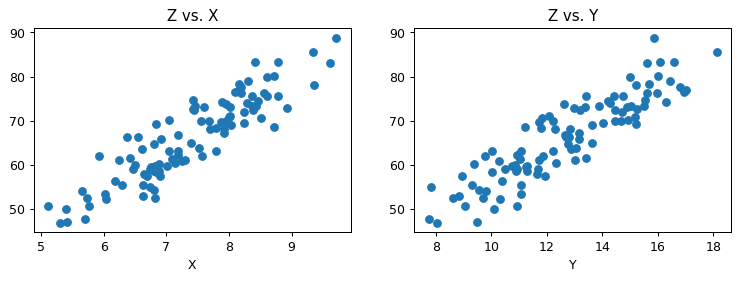

In [9]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(10,3),dpi=90)

ax[0].scatter(x,z)
ax[0].set_title('Z vs. X')
ax[0].set_xlabel('X')
ax[1].scatter(y,z)
ax[1].set_title('Z vs. Y')
ax[1].set_xlabel('Y')

In [10]:
def mse_ols(b):
    return np.mean((z-x*b[0]-y*b[1])**2)

In [11]:
def mse_ridge(b,l=2):
    return np.mean((z-x*b[0]-y*b[1])**2)+l*(b[0]**2+b[1]**2)

In [12]:
def mse_lasso(b,l=2):
    return np.mean((z-x*b[0]-y*b[1])**2)+l*(np.abs(b[0])+np.abs(b[1]))

In [13]:
def gradient_descent_two_modified(z,h=0.7,b=(40,40),l=None):
    gradient = np.array([1.01,1.01])
    b_new = b
    dxy = 0.001 
    b1_list=[]
    b2_list=[]
    while abs(gradient[0])>0.033 or abs(gradient[1])>0.033:
        b = b_new
        gradient[0] = (z((b[0]+dxy,b[1]))-z(b))/dxy
        gradient[1] = (z((b[0],b[1]+dxy))-z(b))/dxy
        z_old = z(b)
        b1_list.append(b[0])
        b2_list.append(b[1])
        b_new = b-h*gradient
        z_new = z(b_new)
        
        #Adjust the stepsize to ensure convergence
        while z_new> z_old:
            h = 0.9*h
            b_new = b-h*gradient
            z_new = z(b_new)
    return b,z_old,b1_list,b2_list

In [14]:
g1 = gradient_descent_two_modified(mse_ols,h=0.001,b=(-20,-20))

In [15]:
g2 = gradient_descent_two_modified(mse_ridge,h=0.001,b=(-20,-20))

In [16]:
g3 = gradient_descent_two_modified(mse_lasso,h=0.001,b=(-20,-20))

In [17]:
b1,b2 = np.meshgrid(np.arange(-25,25),np.arange(-25,25))
b = list(zip(b1.reshape(50*50),b2.reshape(50*50)))

In [18]:
ols_mse_plot = np.array(list(map(mse_ols,b))).reshape(50,50)
ridge_mse_plot = np.array(list(map(mse_ridge,b))).reshape(50,50)
lasso_mse_plot = np.array(list(map(mse_lasso,b))).reshape(50,50)

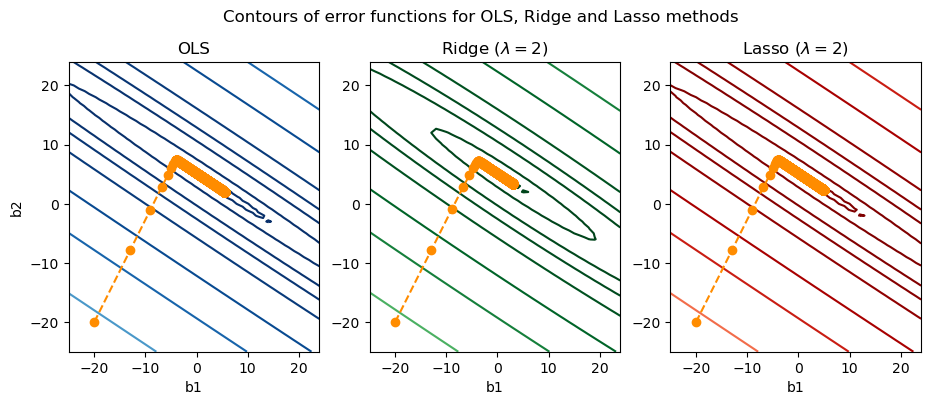

In [19]:
fig,ax = plt.subplots(nrows=1,ncols=3,figsize=(11,4),dpi=100)

c1 = ax[0].contour(b1,b2,ols_mse_plot,levels=[100,1000,5000,10000,20000,50000,100000,200000,500000],cmap='Blues_r')
ax[0].set_title('OLS')
ax[0].plot(g1[2],g1[3],color='darkorange',marker='o',ls="--")

c2 = ax[1].contour(b1,b2,ridge_mse_plot,levels=[100,1000,5000,10000,20000,50000,100000,200000,500000],cmap='Greens_r')
ax[1].set_title('Ridge ($\lambda = 2$)')
ax[1].plot(g2[2],g2[3],color='darkorange',marker='o',ls="--")

c3 = ax[2].contour(b1,b2,lasso_mse_plot,levels=[100,1000,5000,10000,20000,50000,100000,200000,500000],cmap="OrRd_r")
ax[2].set_title('Lasso ($\lambda = 2$)')
ax[2].plot(g3[2],g3[3],color='darkorange',marker='o',ls="--")

for i in range(3):
    ax[i].set_xlabel('b1')
ax[0].set_ylabel('b2')
plt.suptitle('Contours of error functions for OLS, Ridge and Lasso methods')
plt.subplots_adjust(top=0.85)
plt.show()

In [20]:
print(f'The minimum value under OLS estimation is at the point {g1[0]}')
print(f'The minimum value under Ridge estimation is at the point {g2[0]}')
print(f'The minimum value under Lasso estimation is at the point {g3[0]}')

The minimum value under OLS estimation is at the point [5.50602923 2.00608843]
The minimum value under Ridge estimation is at the point [3.05679583 3.36939154]
The minimum value under Lasso estimation is at the point [5.04168253 2.26622599]


The ridge seems to be far from the true values (5,2). Lasso seems to provide the better estimate.